# Pipeline for running the Data Shift Algorithm

This pipeline demonstrates the usage of the data shift algorithm on multiple simulated PVLib AC power data streams. It includes scenarios for data sets:
1. With a single changepoint in the series
2. With multiple changepoints in the series

# Run Example with a single changepoint in the data stream

In [1]:
# Import the required packages
import pandas as pd
import matplotlib.pyplot as plt
from pvanalytics.quality import data_shifts as dt

For the first example, we are loading in a simulated PVLib AC power with a single changepoint, occurring on October XX, 2015.

Changepoint at: 2015-01-01 00:00:00


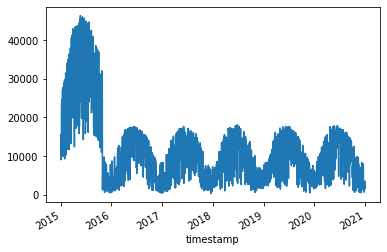

In [2]:
df = pd.read_csv("https://datahub.duramat.org/dataset/7b72ae24-c0c2-4339-93dd-2c9c10d64c90/resource/a2f73100-2482-4d9f-a348-c45a6512964f/download/pvlib_data_shift_stream_example_1.csv")
df.index = pd.to_datetime(df['timestamp'])
df['value'].plot()
print("Changepoint at: " + str(df[df['label'] == 1].index[0]))

C:\Users\kperry\.conda\envs\pvanalytics\lib\site-packages\pvanalytics\quality\data_shifts.py:54: UserWarning: Time series frequency not set. Setting freqeuncy to daily, and resampling the daily sum value.
  warnings.warn("Time series frequency not set. Setting freqeuncy to daily, and "


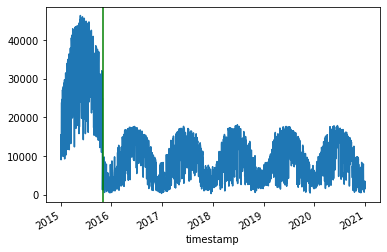

In [3]:
# Run the data shift algorithm (with default parameters) on the data stream
shift_list = dt.detect_data_shifts(time_series = df['value'])

# Re-plot the time series, with a vertical line where the detected changepoint is
df['value'].plot()
for cpd in shift_list:        
    plt.axvline(cpd, color="green")
plt.show()

C:\Users\kperry\.conda\envs\pvanalytics\lib\site-packages\pvanalytics\quality\data_shifts.py:54: UserWarning: Time series frequency not set. Setting freqeuncy to daily, and resampling the daily sum value.
  warnings.warn("Time series frequency not set. Setting freqeuncy to daily, and "


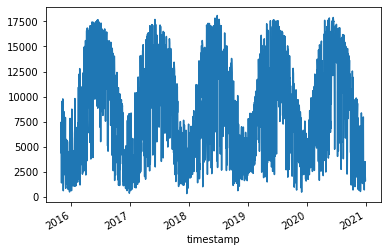

In [4]:
# Filter the time series by detected changepoints, taking the longest continuous segment between detected changepoints
interval_dict = dt.filter_data_shifts(time_series = df['value'])
df['value'][interval_dict['start_date']:interval_dict['end_date']].plot()
plt.show()

# Run Example with multiple changepoints in the data stream

Changepoints at: 
[Timestamp('2017-02-05 00:00:00'), Timestamp('2018-05-21 00:00:00')]


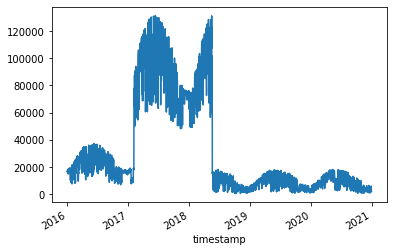

In [5]:
df = pd.read_csv("https://datahub.duramat.org/dataset/7b72ae24-c0c2-4339-93dd-2c9c10d64c90/resource/e0efcdce-58b2-49a5-b35d-8b491f1b70c7/download/pvlib_data_shift_stream_example_2.csv")
df.index = pd.to_datetime(df['timestamp'])
df['value'].plot()
print("Changepoints at: ")
print(str(list(df[df['label'] == 1].index)))

C:\Users\kperry\.conda\envs\pvanalytics\lib\site-packages\pvanalytics\quality\data_shifts.py:54: UserWarning: Time series frequency not set. Setting freqeuncy to daily, and resampling the daily sum value.
  warnings.warn("Time series frequency not set. Setting freqeuncy to daily, and "


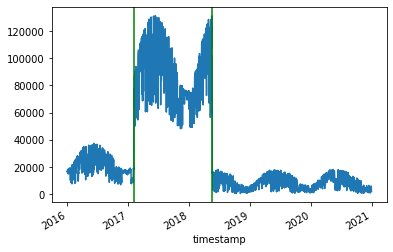

In [6]:
# Run the data shift algorithm (with default parameters) on the data stream
shift_list = dt.detect_data_shifts(time_series = df['value'])

# Re-plot the time series, with a vertical line where the detected changepoint is
df['value'].plot()
for cpd in shift_list:        
    plt.axvline(cpd, color="green")
plt.show()

C:\Users\kperry\.conda\envs\pvanalytics\lib\site-packages\pvanalytics\quality\data_shifts.py:54: UserWarning: Time series frequency not set. Setting freqeuncy to daily, and resampling the daily sum value.
  warnings.warn("Time series frequency not set. Setting freqeuncy to daily, and "


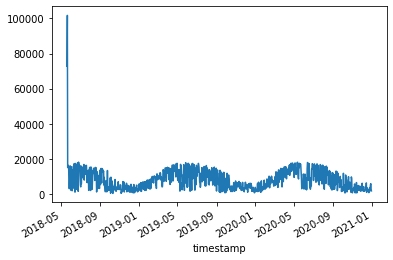

In [7]:
# Filter the time series by detected changepoints, taking the longest continuous segment between detected changepoints
interval_dict = dt.filter_data_shifts(time_series = df['value'])
df['value'][interval_dict['start_date']:interval_dict['end_date']].plot()
plt.show()